In [32]:
import sys 

from elasticc_for_etienne import *

sys.path.insert(1, '/media3/etienne/workdir/spark_AGN/Visualise')
from visualise_tools import *

sys.path.insert(1, '/media3/etienne/workdir/spark_AGN/Build_classifier')
from classifier_tools import *

In [6]:
features = pd.read_parquet('features_snia.parquet')
features

,a,t0,tT,tfall,trise,Tmin,dT,ksig
0,1.184032,-4.583689,19.340043,31.312339,-2.614137,3434.949575,4081.013873,2.926570
1,1.267592,-6.617752,23.711337,32.302226,-3.177087,3414.364760,3346.360328,7.833634
2,1.567421,-5.935918,-39.009290,37.602245,-4.045199,2923.429737,21006.416864,24.584209
3,18.453099,-64.978723,-7.986684,34.181694,-11.815117,4086.558634,12014.603774,0.081624
4,1.860580,1.443533,19.673052,20.746808,-4.962831,4342.273689,3361.773417,0.601058
...,...,...,...,...,...,...,...,...
27489,3.550020,11.013319,-52.921788,15.957543,-9.122765,3211.536030,99989.526647,10.738815
27490,3.667479,2.506071,5.268546,15.367495,-3.868240,5335.811921,0.184261,26.053198
27491,9.946149,-53.417248,14.855713,29.054321,-0.032715,3980.122087,21307.466335,10.679246
27492,3.254889,9.334038,14.025959,19.128049,-6.382640,1616.327287,7059.512300,65.588583


In [7]:
param_names = ['a', 't0', 'tT', 'tfall', 'trise', 'Tmin', 'dT', 'ksig']

Index(['a', 't0', 'tT', 'tfall', 'trise', 'Tmin', 'dT', 'ksig'], dtype='object')

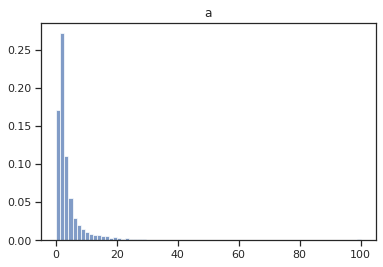

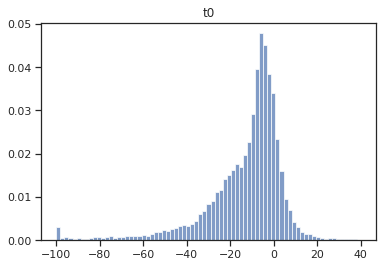

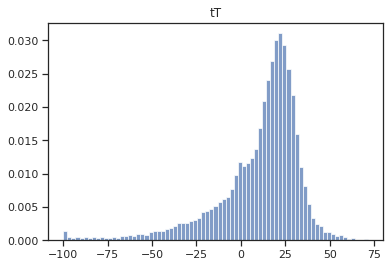

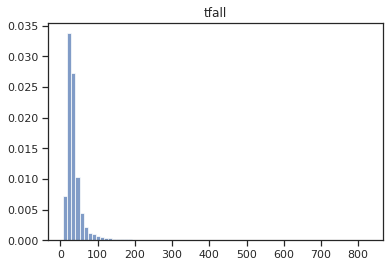

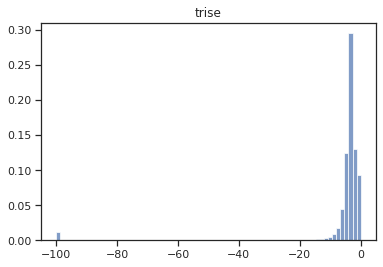

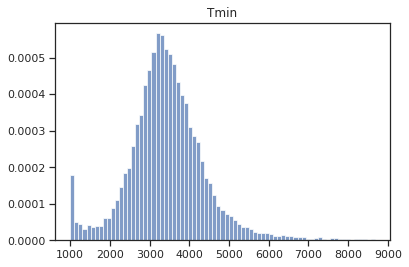

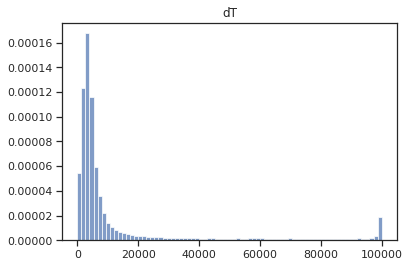

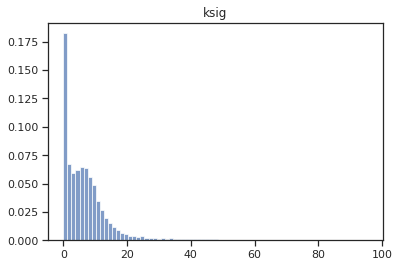

In [9]:
for i in features.keys():
    plt.figure()
    plt.title(i)
    
    zoom = zoom_in(features, 0.99, param_names)
    zoom_features = features[zoom]
    
    nbins = 75
    
    plt.hist(zoom_features[i], bins = nbins, alpha=0.7, density=True);

features.keys()

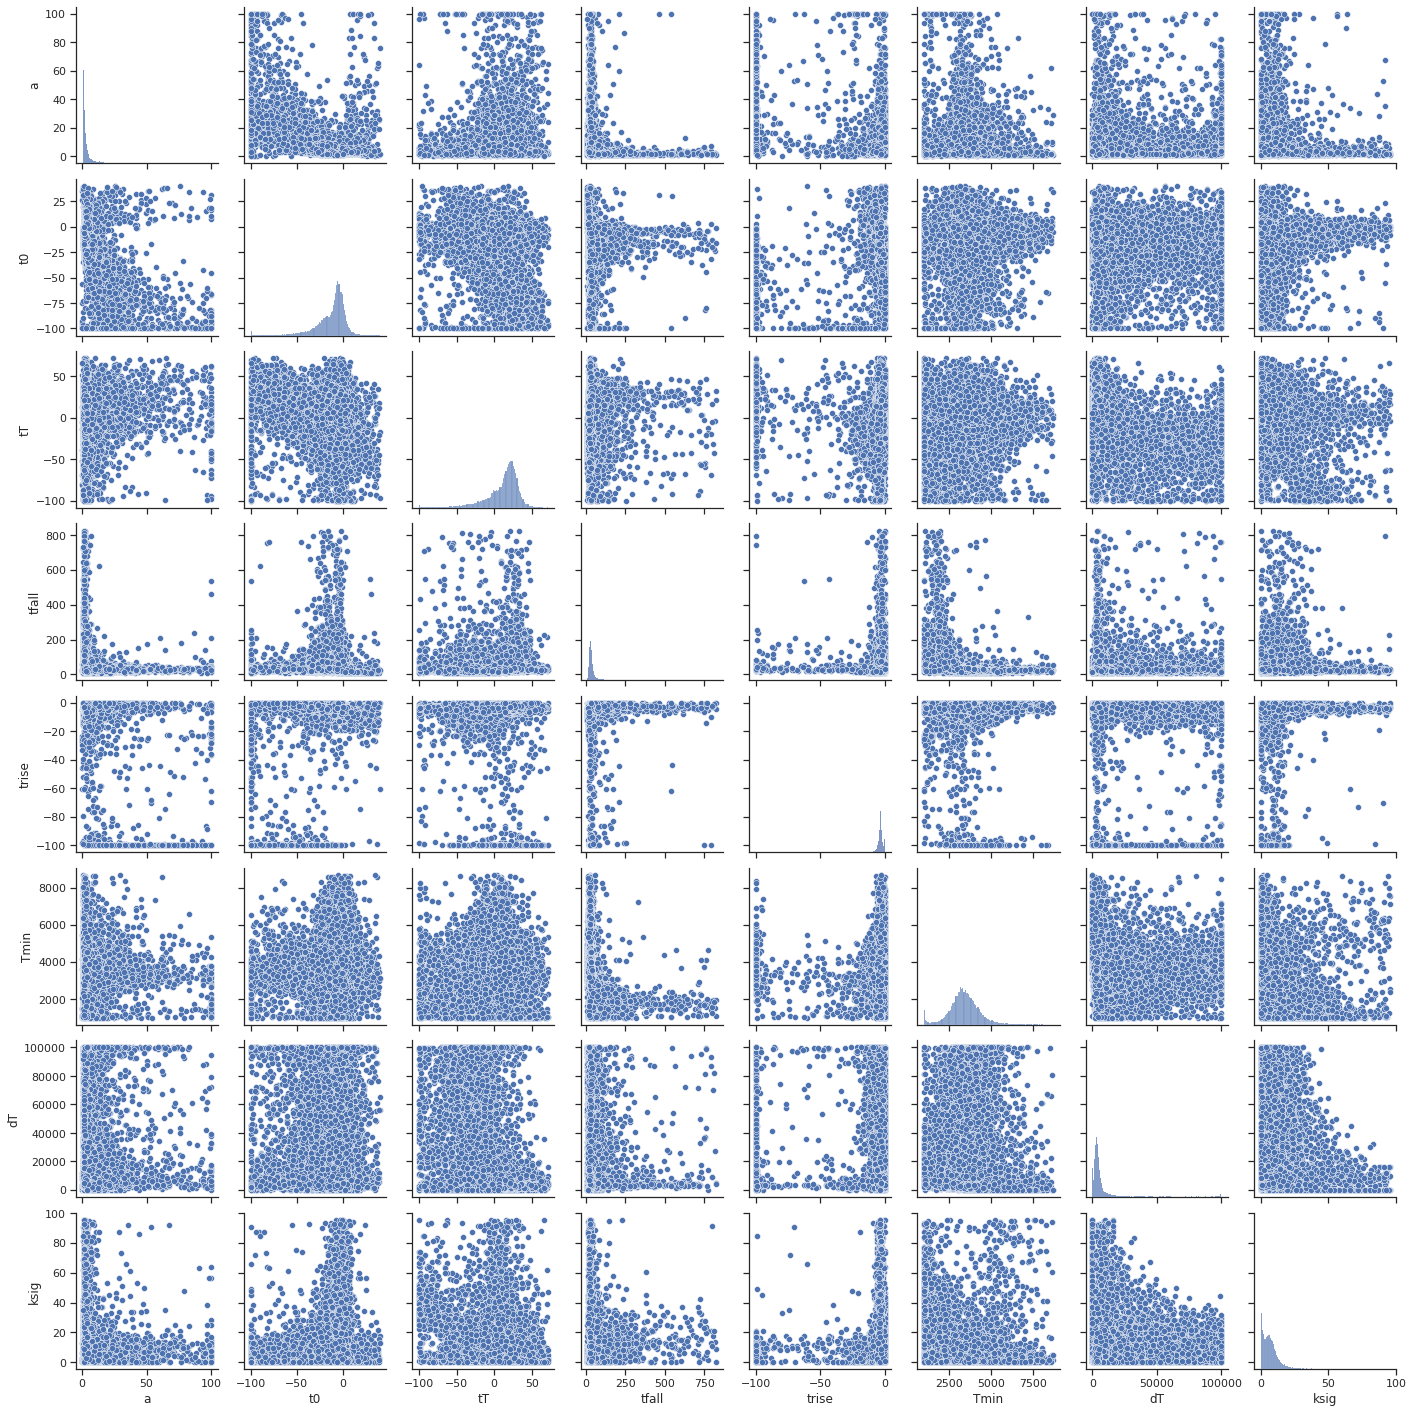

In [11]:
parameters = param_names
parameters_to_zoom = param_names

zoom = 0.99
mask_zoom = zoom_in(features, zoom, parameters_to_zoom)

sns.set_theme(style="ticks")

sns_plot = sns.pairplot(features[mask_zoom])

In [25]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=0).fit(features)
scored = features.copy()
scored['score'] = clf.decision_function(features)
scored['anomaly'] = scored['score']<-0.2

In [35]:
scored[scored['anomaly']]

,a,t0,tT,tfall,trise,Tmin,dT,ksig,score,anomaly
1300,24.874394,-99.999992,-99.999992,193.617887,-99.999639,1000.008235,3362.354436,35.654851,-0.200186,True
1367,99.999976,-99.999997,-78.909485,102.968061,-49.399663,1183.241942,2911.904074,6.462871,-0.204554,True
1621,0.010000,-99.999998,87.758322,16.229241,-48.758554,99999.999435,99999.219399,7.815797,-0.212529,True
2888,100.000000,-100.000000,-100.000000,60.075321,-35.775958,1000.000000,2128.354660,29.033543,-0.201708,True
3470,99.938767,-97.813396,28.669361,31.568781,-99.999999,3251.582362,99999.999778,9.898652,-0.217240,True
...,...,...,...,...,...,...,...,...,...,...
26639,99.764610,-99.524291,9.495323,210.351282,-69.766529,1017.780481,3427.932044,0.012337,-0.207975,True
26833,99.997913,-100.000000,-99.999999,181.472669,-66.370953,1000.039635,2266.941907,42.105696,-0.222434,True
26879,85.607966,-100.000000,-100.000000,118.820654,-59.625900,1000.452568,2636.413337,35.914766,-0.205750,True
27107,3.892049,-100.000000,-100.000000,123.094859,-98.229424,1000.000098,2900.283986,59.854875,-0.203729,True
